In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = "C:/Users/jacqueno/Documents/IODAA/Cours_IODAA/TP_Prog"
data = pd.read_csv("{}/train.csv".format(path), sep=',')
realtest= pd.read_csv("{}/test.csv".format(path), sep=',')


In [2]:
pd.DataFrame(data=data, index=[0, 1, 2, 3])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False


In [3]:
pd.DataFrame(data=realtest, index=[0, 1, 2, 3])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter


In [4]:
# pd.DataFrame(data=data).to_numpy()

In [5]:
# pd.DataFrame(data=realtest).to_numpy()

In [6]:
Xbrutdata=data.values[:,:-1]
Ybrutdata=data.values[:,-1:]
print(Xbrutdata[:3,:], Ybrutdata[:3])

Xbrutrealtest=realtest.values[:,:-1]
Ybrutrealtest=realtest.values[:,-1:]


[['0001_01' 'Europa' False 'B/0/P' 'TRAPPIST-1e' 39.0 False 0.0 0.0 0.0
  0.0 0.0 'Maham Ofracculy']
 ['0002_01' 'Earth' False 'F/0/S' 'TRAPPIST-1e' 24.0 False 109.0 9.0 25.0
  549.0 44.0 'Juanna Vines']
 ['0003_01' 'Europa' False 'A/0/S' 'TRAPPIST-1e' 58.0 True 43.0 3576.0
  0.0 6715.0 49.0 'Altark Susent']] [[False]
 [True]
 [False]]


In [7]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [9]:
#verifier s'il y a des duplicats
dupli_all=data.duplicated()
list=[]
for i in range(8693):
    if dupli_all[i]==True:
        list.append(i)
print(list)

#verifier s'il y a des duplicats de noms/homonymes
dupli_name=data.duplicated(subset="Name")
list=[]
listnamedupli=[]
for i in range(8693):
    if dupli_name[i]==True:
        list.append(i)
print(list)
for k in list:
    if pd.isna(data.iloc[k,12])==False:
        listnamedupli.append(data.iloc[k,12])
        data_name_dupli=data[data["Name"]==data.iloc[k,12]]
        print(pd.DataFrame(data=data_name_dupli))
        

[]
[58, 65, 77, 101, 126, 165, 297, 305, 331, 411, 629, 712, 733, 749, 809, 813, 822, 833, 871, 901, 911, 956, 985, 1040, 1090, 1097, 1172, 1207, 1262, 1274, 1284, 1316, 1397, 1401, 1412, 1427, 1582, 1616, 1617, 1645, 1718, 1726, 1755, 1779, 1798, 1824, 1826, 1830, 1855, 1911, 1917, 1928, 1959, 2063, 2068, 2117, 2136, 2149, 2220, 2274, 2406, 2574, 2612, 2650, 2700, 2734, 2753, 2778, 2803, 2852, 2882, 2930, 3033, 3072, 3091, 3234, 3259, 3291, 3309, 3381, 3411, 3415, 3463, 3465, 3493, 3496, 3565, 3589, 3616, 3628, 3637, 3665, 3735, 3743, 3754, 3763, 3790, 3803, 3877, 3910, 3919, 3964, 4066, 4082, 4106, 4108, 4109, 4156, 4193, 4217, 4290, 4392, 4410, 4429, 4446, 4472, 4502, 4536, 4539, 4548, 4566, 4674, 4698, 4728, 4733, 4749, 4768, 4774, 4814, 4824, 4889, 5026, 5080, 5179, 5211, 5273, 5285, 5289, 5331, 5383, 5388, 5432, 5531, 5577, 5611, 5614, 5619, 5669, 5702, 5711, 5762, 5806, 5831, 5852, 6001, 6062, 6088, 6089, 6106, 6113, 6124, 6245, 6262, 6284, 6301, 6319, 6339, 6414, 6467, 6526, 66

In [10]:
print(len(data["Cabin"].unique()))
print(len(data["VIP"].unique()))
print(len(data["Name"].unique()))

6561
3
8474


In [11]:
age_groups = pd.cut(data['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, np.inf])
data.groupby(age_groups)['Age'].count()

Age
(0.0, 10.0]      540
(10.0, 20.0]    1717
(20.0, 30.0]    2668
(30.0, 40.0]    1680
(40.0, 50.0]     994
(50.0, 60.0]     517
(60.0, 70.0]     183
(70.0, inf]       37
Name: Age, dtype: int64

<AxesSubplot:title={'center':'percentage of people transported in the train set'}, ylabel='Transported'>

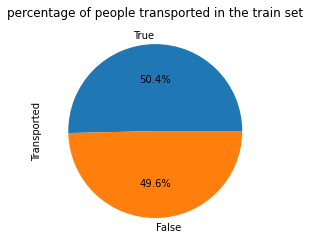

In [12]:
data["Transported"].value_counts().plot(kind='pie', autopct='%1.1f%%', title='percentage of people transported in the train set')

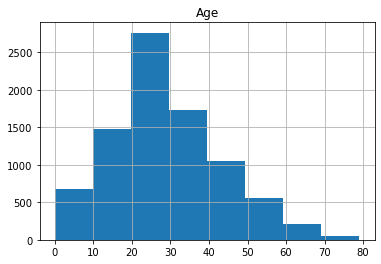

In [13]:
data_age = pd.DataFrame({
    'Age':data['Age'],
     })
dhist = data_age.hist(bins=8)

[Text(0.5, 1.0, 'People transported or not by age range in train set')]

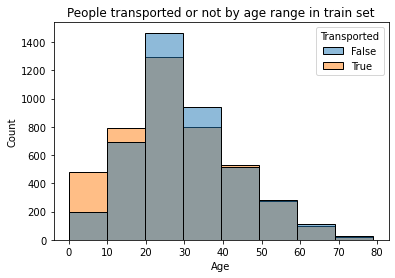

In [14]:
import seaborn as sns
sns.histplot(x="Age", data=data, hue="Transported", bins=8).set(title='People transported or not by age range in train set')

[Text(0.5, 1.0, 'People transported or not by Homeplanet')]

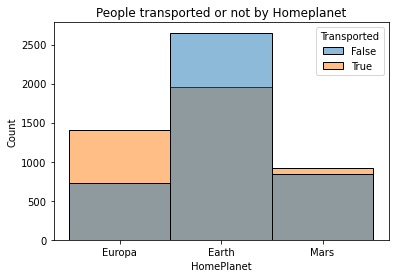

In [15]:
sns.histplot(x="HomePlanet", data=data, hue="Transported").set(title='People transported or not by Homeplanet')

[Text(0.5, 1.0, 'People transported or not by destination')]

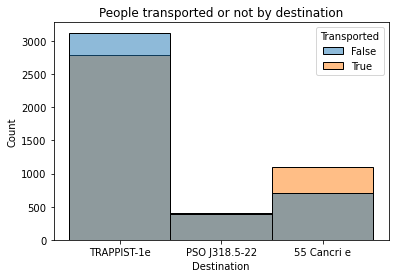

In [16]:
sns.histplot(x="Destination", data=data, hue="Transported").set(title='People transported or not by destination')

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  Cryo_False  Cryo_True  
0        False           1          0  
1         True          

[Text(0.5, 1.0, 'People transported or not by Cryosleep status')]

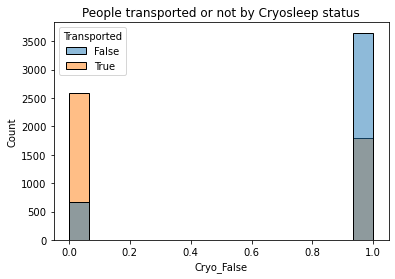

In [17]:
data_cryo_ohe=pd.get_dummies(data['CryoSleep'], prefix='Cryo')
data_2=pd.concat([data, data_cryo_ohe], axis=1, join='inner')
print(data_2.head())
data_2 = data_2.drop('CryoSleep',axis = 1)
print(data_2.head())
sns.histplot(x="Cryo_False", data=data_2, hue="Transported").set(title='People transported or not by Cryosleep status')

In [18]:
print(data.isnull().sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [19]:
#Gérer les valeurs manquantes 
data_new=data.copy(deep=True)
data_new.replace('', np.nan, inplace=True)
att={"RoomService": 7, "FoodCourt": 8, "ShoppingMall": 9, "Spa": 10, "VRDeck": 11}
for key,value in att.items():
    i=int(value)
    for j in range(8693):
        if ((data_new.iloc[j,2]==True) and (np.isnan(data_new.iloc[j,i])==True)):
            data_new.iloc[j,i]=0
        elif ((data_new.iloc[j,2]==False) and (np.isnan(data_new.iloc[j,i])==True)):
            data_new.iloc[j,i]=np.round((data_new[key].sum())/(np.where(data_new[key]>-0.1, 1, 0).sum()))  
        elif (np.isnan(data_new.iloc[j,i])==True):
            data_new.iloc[j,i]=np.round((data_new[key].sum())/(np.where(data_new[key]>-0.1, 1, 0).sum()))            
pd.DataFrame(data=data_new, index=[59])

att2={"Age": 5}
for key,value in att2.items():
    i=value
    for j in range(8693):
        if np.isnan(data_new.iloc[j,i])==True:
            data_new.iloc[j,i]=data_new.iloc[:,5].mean()
pd.DataFrame(data=data_new, index=[566])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
566,0593_01,Mars,False,D/24/P,TRAPPIST-1e,28.82793,NaN,43.0,152.0,182.0,1.0,2005.0,Hon Kra,False


In [20]:
for j in range(8693):
    if pd.isna(data_new.iloc[j,1])==True:
        data_new.iloc[j,1]=data_new.iloc[:,1].mode([1]).tolist()[0]
# print((data_new.iloc[:,1].mode([1])).tolist()[0])
    if pd.isna(data_new.iloc[j,2])==True:
        data_new.iloc[j,2]=data_new.iloc[:,2].mode([1]).tolist()[0]
    if (pd.isna(data_new.iloc[j,4])==True):
        data_new.iloc[j,4]=data_new.iloc[:,4].mode([1]).tolist()[0]
    if (pd.isna(data_new.iloc[j,6])==True):
        data_new.iloc[j,6]=data_new.iloc[:,6].mode([1]).tolist()[0]

pd.DataFrame(data=data_new, index=[38, 568])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
38,0036_01,Earth,False,F/8/S,55 Cancri e,15.0,False,0.0,492.0,48.0,20.0,401.0,Marina Leodger,False
568,0594_02,Earth,False,E/39/S,TRAPPIST-1e,24.0,False,225.0,4.0,0.0,670.0,113.0,Cores Flynner,False


In [21]:
data_new[['Deck_Cabin', 'Num_Cabin', 'Side_Cabin']] = data_new["Cabin"].apply(lambda x: pd.Series(str(x).split("/")))
pd.DataFrame(data=data_new)
data_new.replace('', np.NaN, inplace=True)
print(pd.DataFrame(data=data_new, index=[10, 11, 12, 13, 14, 15]))
for j in range(8693):
    if pd.isna(data_new.iloc[j,14])==True:
        data_new.iloc[j,14]=data_new.iloc[:,14].mode([1]).tolist()[0]
    if pd.isna(data_new.iloc[j,16])==True:
        data_new.iloc[j,16]=data_new.iloc[:,16].mode([1]).tolist()[0]

lab = data_new.pop('Transported')
data_new2 = pd.concat([data_new, lab], 1)
pd.DataFrame(data=data_new2, index=[15])
print(pd.isna(data_new.iloc[j,15]))
data_new3 = data_new2.drop(data_new2.columns[[0, 3, 12, 14]], axis=1)
print(data_new3)
pd.DataFrame(data=data_new3, index=[15])

   PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
10     0008_02     Europa      True  B/1/P  TRAPPIST-1e  34.0  False   
11     0008_03     Europa     False  B/1/P  55 Cancri e  45.0  False   
12     0009_01       Mars     False  F/1/P  TRAPPIST-1e  32.0  False   
13     0010_01      Earth     False  G/1/S  TRAPPIST-1e  48.0  False   
14     0011_01      Earth     False  F/2/P  TRAPPIST-1e  28.0  False   
15     0012_01      Earth     False    NaN  TRAPPIST-1e  31.0  False   

    RoomService  FoodCourt  ShoppingMall    Spa  VRDeck             Name  \
10          0.0        0.0           0.0    0.0     0.0   Altardr Flatic   
11         39.0     7295.0         589.0  110.0   124.0    Wezena Flatic   
12         73.0        0.0        1123.0    0.0   113.0     Berers Barne   
13        719.0        1.0          65.0    0.0    24.0   Reney Baketton   
14          8.0      974.0          12.0    2.0     7.0  Elle Bertsontry   
15         32.0        0.0         876.

C:\Users\jacqueno\AppData\Local\Temp\ipykernel_14024\1174954626.py:12: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data_new2 = pd.concat([data_new, lab], 1)


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck_Cabin,Side_Cabin,Transported
15,Earth,False,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,nan,S,False


In [22]:
print(data_new2.isnull().sum())
print(data_new3.isnull().sum())

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Deck_Cabin        0
Num_Cabin       199
Side_Cabin        0
Transported       0
dtype: int64
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Deck_Cabin      0
Side_Cabin      0
Transported     0
dtype: int64


In [23]:
y_train=data_new3.pop("Transported")
print(type(y_train.values))

x_train=data_new3
cat=["HomePlanet", "CryoSleep", "Destination", "VIP", "Deck_Cabin", "Side_Cabin"]

X_train = pd.get_dummies(x_train, columns=cat)
print(X_train[0:1])

Y_train=pd.get_dummies(y_train)

print(Y_train.to_numpy().shape)

print(Y_train.to_numpy()[0:2,:])
Y_train_transported=Y_train.drop(Y_train.columns[0], axis=1)
Y_train_transport=np.array(Y_train_transported.to_numpy())
Y_train_tr=np.ravel(Y_train_transport)           
print(Y_train_tr[0:2])

<class 'numpy.ndarray'>
    Age  RoomService  FoodCourt  ShoppingMall  Spa  VRDeck  HomePlanet_Earth  \
0  39.0          0.0        0.0           0.0  0.0     0.0                 0   

   HomePlanet_Europa  HomePlanet_Mars  CryoSleep_False  ...  Deck_Cabin_B  \
0                  1                0                1  ...             1   

   Deck_Cabin_C  Deck_Cabin_D  Deck_Cabin_E  Deck_Cabin_F  Deck_Cabin_G  \
0             0             0             0             0             0   

   Deck_Cabin_T  Deck_Cabin_nan  Side_Cabin_P  Side_Cabin_S  
0             0               0             1             0  

[1 rows x 27 columns]
(8693, 2)
[[1 0]
 [0 1]]
[0 1]


In [24]:
#split train set en train + validation set
from sklearn.model_selection import train_test_split
X_train_split, X_val, Y_train_split, Y_val = train_test_split(X_train, Y_train_tr, test_size=0.33, random_state=0)
print("taille des sets", X_train_split.shape, Y_train_split.shape, X_val.shape, Y_val.shape)

taille des sets (5824, 27) (5824,) (2869, 27) (2869,)


In [25]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

mod = SVC(kernel="linear", max_iter=10000)
mod.fit(X_train_split,Y_train_split)
Yhat_train=mod.predict(X_train_split)
Yhat_val=mod.predict(X_val)
auc=roc_auc_score(Y_val, mod.decision_function(X_val))
print("modele SVM lineaire: accuraccy sur train set:", accuracy_score(Y_train_split, Yhat_train))
print("modele SVM lineaire: accuraccy sur validation set:", accuracy_score(Y_val, Yhat_val))
print("\n linear SVM: precision, recall, et f1 scores class 1: sur validation set:", "\n", 
      precision_score(Y_val, Yhat_val), "\n", recall_score(Y_val, Yhat_val), "\n", f1_score(Y_val, Yhat_val))
print("\n linear SVM: precision, recall, et f1 scores class 0: sur validation set", "\n", 
       precision_score(Y_val, Yhat_val, pos_label=0), "\n", recall_score(Y_val, Yhat_val, pos_label=0), 
       "\n", f1_score(Y_val, Yhat_val, pos_label=0))
print("AUC modele SVM lineaire", auc)
print(auc)

mod2 = svm.SVC(gamma = 10)
mod2.fit(X_train_split,Y_train_split)
Yhat_train=mod2.predict(X_train_split)
Yhat_val=mod2.predict(X_val)
auc=roc_auc_score(Y_val, mod2.decision_function(X_val))
print("\n modele SVM: accuraccy sur train set:", accuracy_score(Y_train_split, Yhat_train))
print("modele SVM: accuraccy sur validation set:", accuracy_score(Y_val, Yhat_val))
print("\n SVM: precision, recall, et f1 scores class 1: sur validation set:", "\n", 
      precision_score(Y_val, Yhat_val), "\n", recall_score(Y_val, Yhat_val), "\n", f1_score(Y_val, Yhat_val))
print("\n SVM: precision, recall, et f1 scores class 0: sur validation set", "\n", 
       precision_score(Y_val, Yhat_val, pos_label=0), "\n", recall_score(Y_val, Yhat_val, pos_label=0), 
       "\n", f1_score(Y_val, Yhat_val, pos_label=0))
print("AUC modele SVM", auc)
print(auc)



C:\Users\jacqueno\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


modele SVM lineaire: accuraccy sur train set: 0.6256868131868132
modele SVM lineaire: accuraccy sur validation set: 0.6106657371906588

 linear SVM: precision, recall, et f1 scores class 1: sur validation set: 
 0.5719523373052245 
 0.8721174004192872 
 0.6908386382507611

 linear SVM: precision, recall, et f1 scores class 0: sur validation set 
 0.7336244541484717 
 0.35048678720445064 
 0.47435294117647064
AUC modele SVM lineaire 0.5887522852319347
0.5887522852319347

 modele SVM: accuraccy sur train set: 0.9520947802197802
modele SVM: accuraccy sur validation set: 0.6573719065876612

 SVM: precision, recall, et f1 scores class 1: sur validation set: 
 0.8181818181818182 
 0.4025157232704403 
 0.5395784543325527

 SVM: precision, recall, et f1 scores class 0: sur validation set 
 0.605080831408776 
 0.9109874826147427 
 0.7271718012767139
AUC modele SVM 0.7222885559083633
0.7222885559083633


In [26]:
# Foret aléatoire sklearn
from sklearn.ensemble import RandomForestClassifier

mod3 =  RandomForestClassifier()
mod3.fit(X_train_split,Y_train_split)
Yhat_train=mod3.predict(X_train_split)
Yhat_val=mod3.predict(X_val)
print("modele RF: accuraccy sur train set:", accuracy_score(Y_train_split, Yhat_train))
print("modele RF: accuraccy sur validation set:", accuracy_score(Y_val, Yhat_val))
print("\n modele RF: precision, recall, et f1 scores class 1: sur validation set:", "\n", 
      precision_score(Y_val, Yhat_val), "\n", recall_score(Y_val, Yhat_val), "\n", f1_score(Y_val, Yhat_val))
print("\n modele RF: precision, recall, et f1 scores class 0: sur validation set", "\n", 
       precision_score(Y_val, Yhat_val, pos_label=0), "\n", recall_score(Y_val, Yhat_val, pos_label=0), 
       "\n", f1_score(Y_val, Yhat_val, pos_label=0))




modele RF: accuraccy sur train set: 0.9522664835164835
modele RF: accuraccy sur validation set: 0.7936563262460787

 modele RF: precision, recall, et f1 scores class 1: sur validation set: 
 0.802451333813987 
 0.7777777777777778 
 0.7899219304471257

 modele RF: precision, recall, et f1 scores class 0: sur validation set 
 0.7854251012145749 
 0.8094575799721836 
 0.7972602739726027


In [27]:
# XGboost
import xgboost as xgb 
bst = xgb.XGBClassifier().fit(X_train_split,Y_train_split) 
Yhat_train = bst.predict(X_train_split)
Yhat_val=bst.predict(X_val)
print("modele XG: accuraccy sur train set:", accuracy_score(Y_train_split, Yhat_train))
print("modele XG: accuraccy sur validation set:", accuracy_score(Y_val, Yhat_val))
print("\n modele XG: precision, recall, et f1 scores class 1: sur validation set:", "\n", 
      precision_score(Y_val, Yhat_val), "\n", recall_score(Y_val, Yhat_val), "\n", f1_score(Y_val, Yhat_val))
print("\n modele XG: precision, recall, et f1 scores class 0: sur validation set", "\n", 
       precision_score(Y_val, Yhat_val, pos_label=0), "\n", recall_score(Y_val, Yhat_val, pos_label=0), 
       "\n", f1_score(Y_val, Yhat_val, pos_label=0))



modele XG: accuraccy sur train set: 0.9038461538461539
modele XG: accuraccy sur validation set: 0.7967933077727432

 modele XG: precision, recall, et f1 scores class 1: sur validation set: 
 0.7860998650472335 
 0.8141160027952481 
 0.7998626845176794

 modele XG: precision, recall, et f1 scores class 0: sur validation set 
 0.8082191780821918 
 0.7795549374130737 
 0.7936283185840708


# Optimisation des performances 

In [ ]:
#grid search sur train set totalpour SVM 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.svm import SVC

classif = SVC()
print(classif.get_params().keys())
grid = [
    {"C": [0.1,1,5,10,100]},
    {"kernel": ["linear"]},
    {"gamma": [0.1, 0.5, 1, 2, 5],
    "kernel": ["rbf"]}
]


search = GridSearchCV(classif, grid)
search.fit(X_train, Y_train_tr)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)